# Digit Recognition 

### Step 1: Import Required Libraries
First, we'll import the necessary libraries for data manipulation, visualization, and building the neural network.

In [32]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Set a random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


### Step 2: Load and Explore the Dataset
We'll load the dataset from the provided CSV file and explore its structure.

In [33]:
# Load the dataset
data = pd.read_csv('train.csv')

# Display the first few rows of the dataset
data.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Step 3: Preprocess the Data
We need to separate the features and labels, normalize the pixel values, and reshape the data for the CNN.

In [34]:
# Separate features and labels
X = data.drop('label', axis=1).values
y = data['label'].values

# Normalize the pixel values
X = X / 255.0

# Reshape the data to fit the CNN input requirements (28x28 pixels and 1 color channel)
X = X.reshape(-1, 28, 28, 1)

# One-hot encode the labels
lb = LabelBinarizer()
y = lb.fit_transform(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 4: Build the CNN Model
We'll define a simple CNN architecture for our digit recognition task.

In [35]:
# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model.summary()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### Step 5: Train the Model
We'll train the CNN model on the training data and validate it on the validation data, using early stopping to prevent overfitting.

In [29]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
batch_size = 64 
epochs = 50 
# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.7385 - loss: 0.7960 - val_accuracy: 0.9725 - val_loss: 0.0958
Epoch 2/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - accuracy: 0.9543 - loss: 0.1484 - val_accuracy: 0.9805 - val_loss: 0.0626
Epoch 3/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9673 - loss: 0.1061 - val_accuracy: 0.9836 - val_loss: 0.0497
Epoch 4/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.9732 - loss: 0.0892 - val_accuracy: 0.9854 - val_loss: 0.0439
Epoch 5/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9777 - loss: 0.0772 - val_accuracy: 0.9880 - val_loss: 0.0369
Epoch 6/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9786 - loss: 0.0673 - val_accuracy: 0.9885 - val_loss: 0.0360
Epoch 7/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.9802 - loss: 0.0633 - val_accuracy: 0.9889 - val_loss: 0.0317
Epoch 8/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - accuracy: 0.9834 - loss: 0.0536 - 

### Step 6: Evaluate the Model
Finally, we'll evaluate the model's performance on the validation set and visualize the training history.

263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.0541 - loss: 2.3213
Validation Loss: 2.3184359073638916
Validation Accuracy: 0.06083333492279053


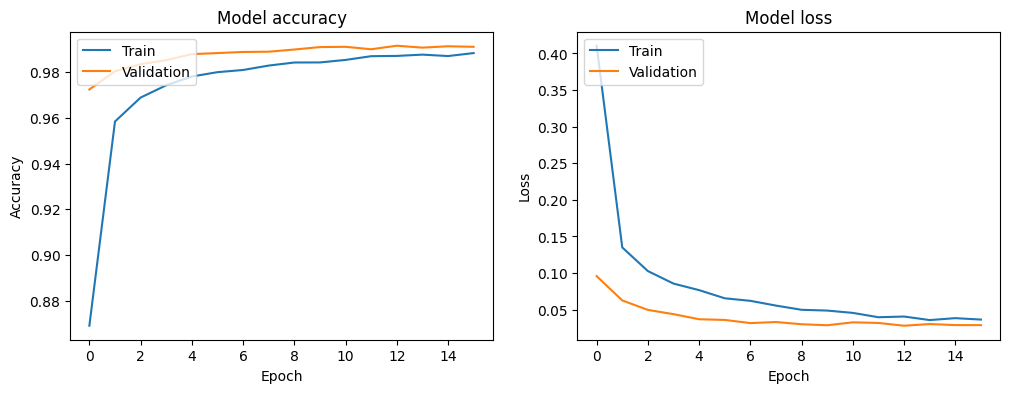

In [36]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

# Plot the training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


### Step 7: Save the Model
Save the trained model for future use.

In [31]:
# Save the model using the recommended native Keras format
model.save('mnist_cnn_model.keras')